In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import os
print(os.getcwd())


C:\Users\manishdanu07


In [32]:
# LOAD DATASET (Train + Validation + Test)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    r"D:\downloads\archive (3)\dataset\Train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = train_gen.flow_from_directory(
    r"D:\downloads\archive (3)\dataset\Train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_data = test_gen.flow_from_directory(
    r"D:\downloads\archive (3)\dataset\Test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)



Found 18896 images belonging to 2 classes.
Found 4723 images belonging to 2 classes.
Found 6738 images belonging to 2 classes.


In [34]:
# BUILD MODEL
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(2, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [36]:
# COMPILE
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [38]:
# TRAIN
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)



Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1259s 2s/step - accuracy: 0.9500 - loss: 0.1256 - val_accuracy: 0.8541 - val_loss: 0.3701
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy: 0.9810 - loss: 0.0542 - val_accuracy: 0.9356 - val_loss: 0.1567
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.9879 - loss: 0.0353 - val_accuracy: 0.9369 - val_loss: 0.1658
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.9914 - loss: 0.0243 - val_accuracy: 0.9132 - val_loss: 0.2893
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.9927 - loss: 0.0213 - val_accuracy: 0.9369 - val_loss: 0.2001
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 675s 1s/step - accuracy: 0.9931 - loss: 0.0190 - val_accuracy: 0.8982 - val_loss: 0.3570
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9049 - val_loss: 0.3682
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 628s 1s/step - accuracy: 0.9964 - loss: 0.0113 - val_acc

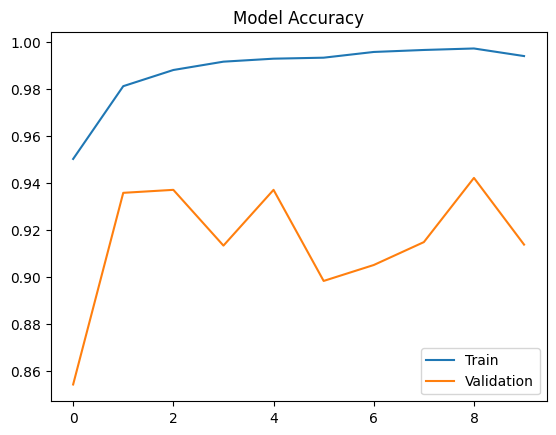

In [39]:
# PLOT TRAIN vs VALIDATION
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Model Accuracy")
plt.show()


In [40]:
# TEST (Final Score)
loss, acc = model.evaluate(test_data)
print("Final Test Accuracy:", acc*100)


211/211 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.9777 - loss: 0.1002
Final Test Accuracy: 97.77382016181946


In [44]:
# SAVE MODEL
model.save("model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Rotten
Confidence: 80.8345


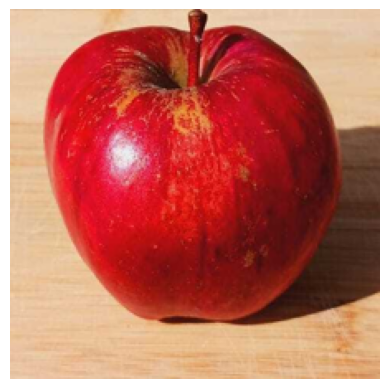

In [46]:
# PREDICT NEW IMAGE
from PIL import Image

img = Image.open("D:\downloads\WhatsApp Image 2026-01-31 at 11.37.50 PM.jpg").resize((224,224))
plt.imshow(img)
plt.axis("off")

img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
classes = ["Fresh", "Rotten"]

print("Prediction:", classes[np.argmax(pred)])
print("Confidence:", np.max(pred)*100)
